In [1]:
# This file is to generate figures for the paper
%matplotlib inline
import numpy as np
import numpy, scipy, matplotlib.pyplot as plt, librosa, IPython.display as ipd
import librosa.display
import matplotlib.cm as cm
import math, scipy.signal
import mir_eval
import utils
import datasets
import onset_functions

In [2]:
boeck_set = datasets.BockSet()
demo_wave = boeck_set.get_piece(boeck_set.get_split(0)[0]).get_wave()
sr = 44100

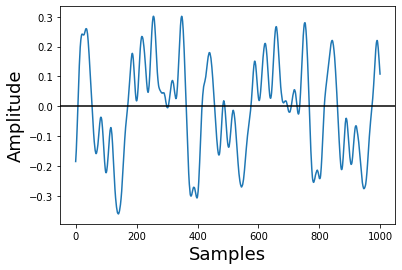

In [3]:
plt.figure()
plt.plot(demo_wave[10000:11000])
plt.xlabel('Samples', fontdict=dict(size=18))
plt.ylabel('Amplitude', fontdict=dict(size=18))
plt.axhline(y=0, color='black')
plt.show()

In [4]:
samples = 1000
freq1 = 10
freq2 = 15
time = np.linspace(0, 2 * np.pi, samples)
wave1 = np.sin(freq1 * time)
wave2 = np.sin(freq2 * time + 90)
sum = wave1 + wave2

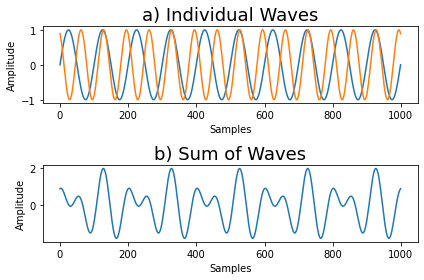

In [5]:
fig, axs = plt.subplots(2)
axs[0].set_title('a) Individual Waves', fontdict=dict(size=18))
axs[0].set(xlabel='Samples', ylabel='Amplitude')
axs[0].plot(wave1, label='Sine Wave 1')
axs[0].plot(wave2, label='Sine Wave 2')
axs[1].set_title('b) Sum of Waves', fontdict=dict(size=18))
axs[1].set(xlabel='Samples', ylabel='Amplitude')
axs[1].plot(sum)
plt.tight_layout()
plt.show()

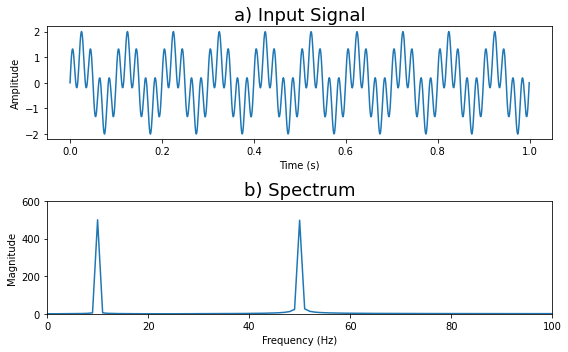

In [6]:
# Set the number of samples
num_samples = 1000

# Set the sampling rate
sampling_rate = 1000

# Generate the time values
time = np.linspace(0, 2 * np.pi, num_samples)

# Generate the input signal
input_signal = np.sin(10 * time) + np.sin(50 * time)

# Compute the Fourier transform of the input signal
fourier_transform = np.fft.fft(input_signal)
spectrum = np.fft.fftshift(np.abs(fourier_transform))

# Get the frequency values for the output signal
frequencies = np.fft.fftfreq(num_samples, d=1. / sampling_rate)
frequencies = np.fft.fftshift(frequencies)

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5))

# Plot the input signal
ax1.plot(np.linspace(0, 999, 1000) / sampling_rate, input_signal)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('a) Input Signal', fontdict=dict(size=18))

# Plot the output signal
ax2.plot(frequencies, spectrum)
ax2.set_xlim(0, 100)
ax2.set_ylim(0, 600)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')
ax2.set_title('b) Spectrum', fontdict=dict(size=18))

plt.tight_layout()

plt.show()

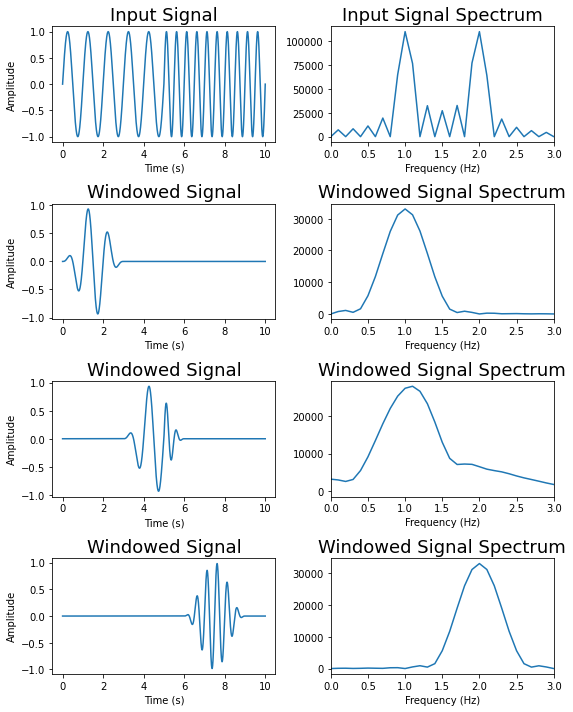

In [7]:
# Set the sampling rate
sampling_rate = 44100

# Set the duration of the first signal
duration1 = 5

# Generate the time values for the first signal
time1 = np.linspace(0, duration1, duration1 * sampling_rate)

# Generate the first signal
signal1 = np.sin(2 * np.pi * 1 * time1)

# Set the duration of the second signal
duration2 = 5

# Generate the time values for the second signal
time2 = np.linspace(0, duration2, duration2 * sampling_rate)

# Generate the second signal
signal2 = np.sin(2 * np.pi * 2 * time2)

# Concatenate the signals
signal = np.concatenate((signal1, signal2))

# Set the duration of the concatenated signal
duration = duration1 + duration2

num_samples = duration * sampling_rate

# Generate the time values for the concatenated signal
time = np.linspace(0, duration, len(signal))

# Set the window size in seconds
window_size = 3

# Compute the number of samples in the window
window_size = window_size * sampling_rate

# Generate the Hanning window
window = np.hanning(window_size)

# Create a figure and a set of subplots
fig, axes = plt.subplots(4, 2, figsize=(8, 10))

# Plot the input signal
axes[0, 0].plot(time, signal)
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].set_title('Input Signal', fontdict=dict(size=18))

# Plot the spectrogram of the input signal
spectrum = np.abs(np.fft.fft(signal))
spectrum = np.fft.fftshift(spectrum)
frequencies = np.fft.fftfreq(num_samples, d=1. / sampling_rate)
frequencies = np.fft.fftshift(frequencies)
axes[0, 1].plot(frequencies, spectrum)
axes[0, 1].set_xlim(0, 3)
axes[0, 1].set_xlabel('Frequency (Hz)')
axes[0, 1].set_title('Input Signal Spectrum', fontdict=dict(size=18))

# Loop over the windows in the signal
for i in range(3):
    window_whole = np.empty_like(signal)
    window_whole[i * window_size: (i + 1) * window_size] = window
    windowed_signal = signal * window_whole

    # Compute the STFT of the windowed signal
    stft = np.fft.fft(windowed_signal)

    # Plot the windowed signal
    axes[i + 1, 0].plot(time, windowed_signal)
    axes[i + 1, 0].set_xlabel('Time (s)')
    axes[i + 1, 0].set_ylabel('Amplitude')
    axes[i + 1, 0].set_title('Windowed Signal', fontdict=dict(size=18))

    # Plot the spectrum of the windowed signal
    spectrum = np.abs(np.fft.fft(windowed_signal))
    spectrum = np.fft.fftshift(spectrum)
    frequencies = np.fft.fftfreq(num_samples, d=1. / sampling_rate)
    frequencies = np.fft.fftshift(frequencies)
    axes[i + 1, 1].plot(frequencies, spectrum)
    axes[i + 1, 1].set_xlim(0, 3)
    axes[i + 1, 1].set_xlabel('Frequency (Hz)')
    axes[i + 1, 1].set_title('Windowed Signal Spectrum', fontdict=dict(size=18))

plt.tight_layout()
plt.show()

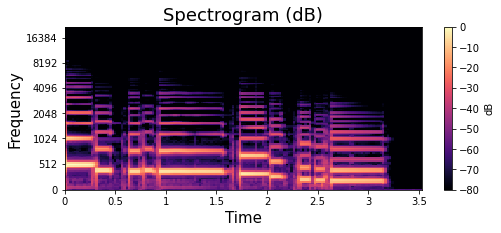

In [8]:
wave = boeck_set.get_piece('ah_development_guitar_Guitar_Licks_06-12').get_wave()
sr = 44100
n_fft = 2048
hop_length = 1024
# fig, ax = plt.subplots(figsize=(15, 5))
mel_signal = librosa.feature.melspectrogram(y=wave, sr=sr, hop_length=hop_length,
 n_fft=n_fft)
spectrogram = np.abs(mel_signal)
power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(8, 3))
librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma',
 hop_length=hop_length)
plt.colorbar(label='dB')
plt.title('Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()

(1.5, 3.0)

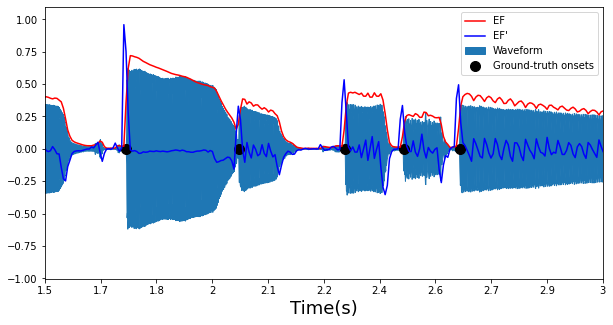

In [24]:
wave = boeck_set.get_piece('ah_development_guitar_Guitar_Licks_06-12').get_wave()
ref_onsets = boeck_set.get_piece('ah_development_guitar_Guitar_Licks_06-12').get_onsets_seconds()
sr = 44100
plt.figure(figsize=(10,5))
librosa.display.waveplot(wave, sr=sr)
plt.scatter(ref_onsets, numpy.zeros_like(ref_onsets), color='k', s=100)
hop_length = 256
frame_length = 512
rmse = librosa.feature.rms(wave, frame_length=frame_length, hop_length=hop_length, center=True)[0]
rmsedt = np.diff(rmse)
frames = range(len(rmse))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)
plt.plot(t[:len(rmse)], rmse/rmse.max(), color='r')
plt.plot(t[:len(rmsedt)], rmsedt/rmsedt.max(), color='b')
plt.xlabel('Time(s)', fontdict=dict(size=18))
plt.legend(['EF', 'EF\'', 'Waveform', 'Ground-truth onsets'])
plt.xlim([1.5,3])